# Exploratory Data Analysis (EDA)

## Imports

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

df = pd.read_csv('../data/base_v3.csv')
pd.set_option('display.max_columns', None)
df.head()

ISRC                       Track                    Album Name  \
0  QM24S2402528         MILLION DOLLAR BABY  Million Dollar Baby - Single   
1  USUG12400910                 Not Like Us                   Not Like Us   
2  QZJ842400387  i like the way you kiss me    I like the way you kiss me   
3  USSM12209777                     Flowers              Flowers - Single   
4  USUG12403398                     Houdini                       Houdini   

           Artist Release Date  All Time Rank  Track Score  Spotify Streams  \
0   Tommy Richman    4/26/2024              1        725.4        390470936   
1  Kendrick Lamar     5/4/2024              2        545.9        323703884   
2         Artemas    3/19/2024              3        538.4        601309283   
3     Miley Cyrus    1/12/2023              4        444.9       2031280633   
4          Eminem    5/31/2024              5        423.3        107034922   

   Spotify Popularity  YouTube Views  YouTube Likes  TikTok Posts  \
0                  92       84274754        1713126       5767700   
1                  92      116347040        3486739        674700   
2                  92      122599116        2228730       3025400   
3                  85     1096100899       10629796       7189811   
4                  88       77373957        3670188         16400   

   TikTok Likes  TikTok Views  AirPlay Spins  Pandora Streams  \
0     651565900    5332281936          40975         18004655   
1      35223547     208339025          40778          7780028   
2     275154237    3369120610          74333          5022621   
3    1078757968   14603725994        1474799        190260277   
4      26617282     266222834          12185          4493884   

   Pandora Track Stations  Shazam Counts  Explicit Track    Length  Releases  \
0                   22931        2669262               0  155.1510         1   
1                   28444        1118279               1  274.1920         5   
2                    5639        5285340               0  143.1865         8   
3                  203384       11822942               0  200.4530        30   
4                    7006         457017               1  227.0320        20   

                                              Genres Registration Country  \
0                                                 []        United States   
1           ['hip hop', 'producer tag - dj mustard']        United States   
2                                      ['synth-pop']        United States   
3  ['yacht rock', 'alternative pop', 'pop rock', ...        United States   
4                                                 []        United States   

   Playlist Probability  High Playlist Probability  
0              0.734589                          1  
1              0.721077                          1  
2              0.771418                          1  
3              0.799485                          1  
4              0.721544                          1

## 1. Number of Track Registrations by Country

The dataset contains registration country information for each of the tracks, which approximitely indicates the region of the artist who produced the track. A map showing how many tracks are registered in each country is useful to get an idea of where the artists of the most popular songs are located and how generalizable to decisions guided by the data are. Based on this, more data can be gathered for countries that are lacking in registration counts.

In [35]:
df['Registration Country'].unique()

array(['United States', 'Netherlands', 'Russian Federation', 'Brazil',
       'South Korea', 'United Kingdom', 'Nigeria', 'Estonia', 'Romania',
       'Uruguay', 'Mexico', 'Germany', 'Japan', 'Singapore', 'Canada',
       'India', 'Austria', 'Chile', 'France', 'Ireland', 'Sweden',
       'Spain', 'Switzerland', 'United Arab Emirates', 'Turkey',
       'Belgium', 'Cyprus', 'Australia', 'Italy', 'Argentina',
       'South Africa', 'Norway', 'Thailand', 'Colombia', 'New Zealand',
       'Gambia', 'Lebanon', 'Paraguay', 'Philippines', 'Poland',
       'Portugal', 'Indonesia', 'Pakistan', 'Peru', 'Finland',
       'Hong Kong SAR, China', 'Egypt', 'Unknown', 'Viet Nam', 'Ukraine'],
      dtype=object)

In [36]:
import numpy as np

# count number of rows with same countries
countries = df['Registration Country'].value_counts().reset_index()
countries.columns = ['Registration Country', 'Count']
countries['Log Count'] = np.log(countries['Count'])
countries.head()

Registration Country  Count  Log Count
0        United States   3134   8.050065
1       United Kingdom    347   5.849325
2                India    159   5.068904
3               Brazil    115   4.744932
4               France    114   4.736198

In [71]:
import plotly.express as px

fig = px.choropleth(
    countries, 
    locations='Registration Country',
    locationmode='country names',
    color='Log Count',  
    color_continuous_scale='Emrld',  
    title='Popular Tracks by Registration Country',
    labels={'Count': 'ln(Track Count)'}
)

# remove exterior box and ocean edges
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False
    )
)

fig.show()

## 2. Distributions of Playlist Probability Scores by Days Since Release

Understanding how release date affects the likelihood of a song being included in a playlist is important. From the visualization below, it is clear that older songs have a greater likelihood of being included in playlists.

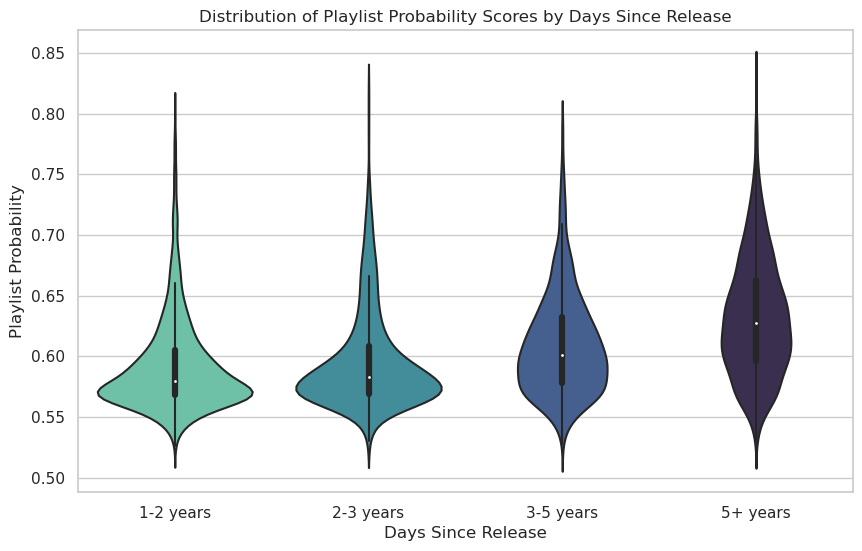

In [76]:
# convert release date to time data type
df['Release Date'] = pd.to_datetime(df['Release Date'])

# calculate days since release date
days_since = pd.DataFrame()
days_since['Days Since Release'] = (pd.to_datetime('today') - df['Release Date']).dt.days

# create bins for days since release date
bins = [365*0.5, 365*2, 365*3, 365*5, days_since['Days Since Release'].max()]
labels = ['1-2 years', '2-3 years', '3-5 years', '5+ years']
days_since['Release Date Binned'] = pd.cut(days_since['Days Since Release'], bins=bins, labels=labels, right=False)

days_since['Playlist Probability'] = df['Playlist Probability']

plt.figure(figsize=(10, 6))
sns.violinplot(x='Release Date Binned', y='Playlist Probability', data=days_since, palette='mako_r')
plt.title('Distribution of Playlist Probability Scores by Days Since Release')
plt.xlabel('Days Since Release')
plt.ylabel('Playlist Probability')
plt.show()

## 3. Streaming and Social Media Song Platform Popularity  

The pie charts below show which platforms generate the most streams and views for all the songs in the dataset. In terms of streaming, Spotify dominates in total streams. In terms of social media, TikTok dominates in total views.

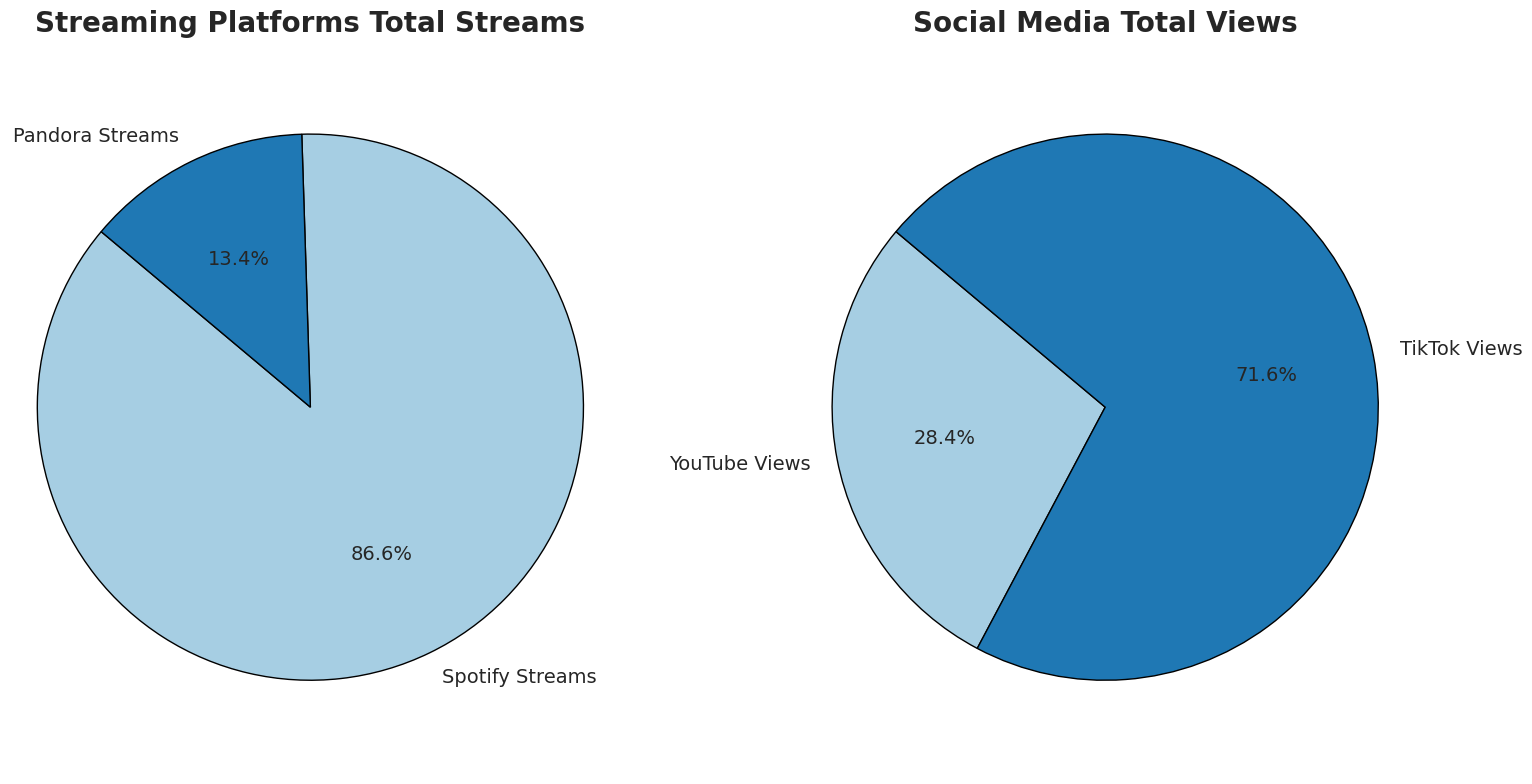

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# streaming platforms
platform_columns_1 = ['Spotify Streams', 'Pandora Streams']

# social media platforms
platform_columns_2 = ['YouTube Views', 'TikTok Views']

# count total streams and views on each platform
totals_1 = df[platform_columns_1].sum()
totals_2 = df[platform_columns_2].sum()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].pie(totals_1, labels=totals_1.index, autopct='%1.1f%%', startangle=140, 
            colors=sns.color_palette('Paired', len(totals_1)), 
            wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Streaming Platforms Total Streams', fontsize=20, fontweight='bold')
axes[0].axis('equal')
for text in axes[0].texts:
    text.set_fontsize(14)

axes[1].pie(totals_2, labels=totals_2.index, autopct='%1.1f%%', startangle=140, 
            colors=sns.color_palette('Paired', len(totals_2)),
            wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Social Media Total Views', fontsize=20, fontweight='bold')
axes[1].axis('equal')
for text in axes[1].texts:
    text.set_fontsize(14)

plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()

## 4. Playlist Probability vs Song Length

Understanding how the length of a song affects its playlist-worthiness is useful. From the scatterplot below, it seems that there is a possible positive correlation between playlist-worthiness and song length

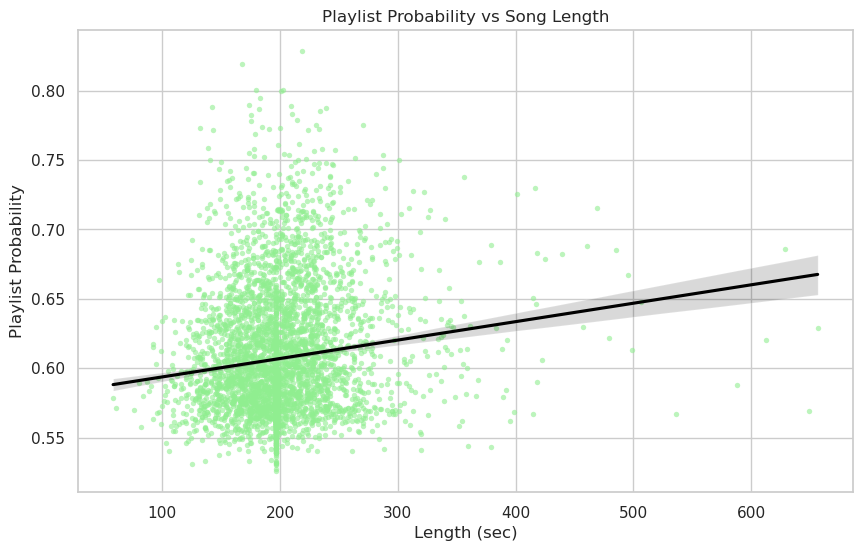

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Length', y='Playlist Probability', color='lightgreen', alpha=0.6, linewidth=0, s=15)

# regression line
sns.regplot(data=df, x='Length', y='Playlist Probability', scatter=False, color='black')

plt.title('Playlist Probability vs Song Length')
plt.xlabel('Length (sec)')
plt.ylabel('Playlist Probability')
plt.show()

## 5. Correlations Between Streaming and Social Media Metrics

It is important to be aware of how different features in the dataset correlate with each other. Highly correlated features can be dropped so as to leave a single feature to lower dimensionality, and weakly correlated features might provide useful information when used together. The pairplot below was log-transformed because the distributions for each feature had heavy right skews. By transforming the data, it becomes easier to see the relationships between each feature, since they are more centered. Certain features like `Spotify Streams` and `Shazam Counts` appear highly correlated; others are less so. The vertical and horizontal lines visible in each plot are a result of the imputation from earlier in which missing values of a feature were replaced by the feature's median. 

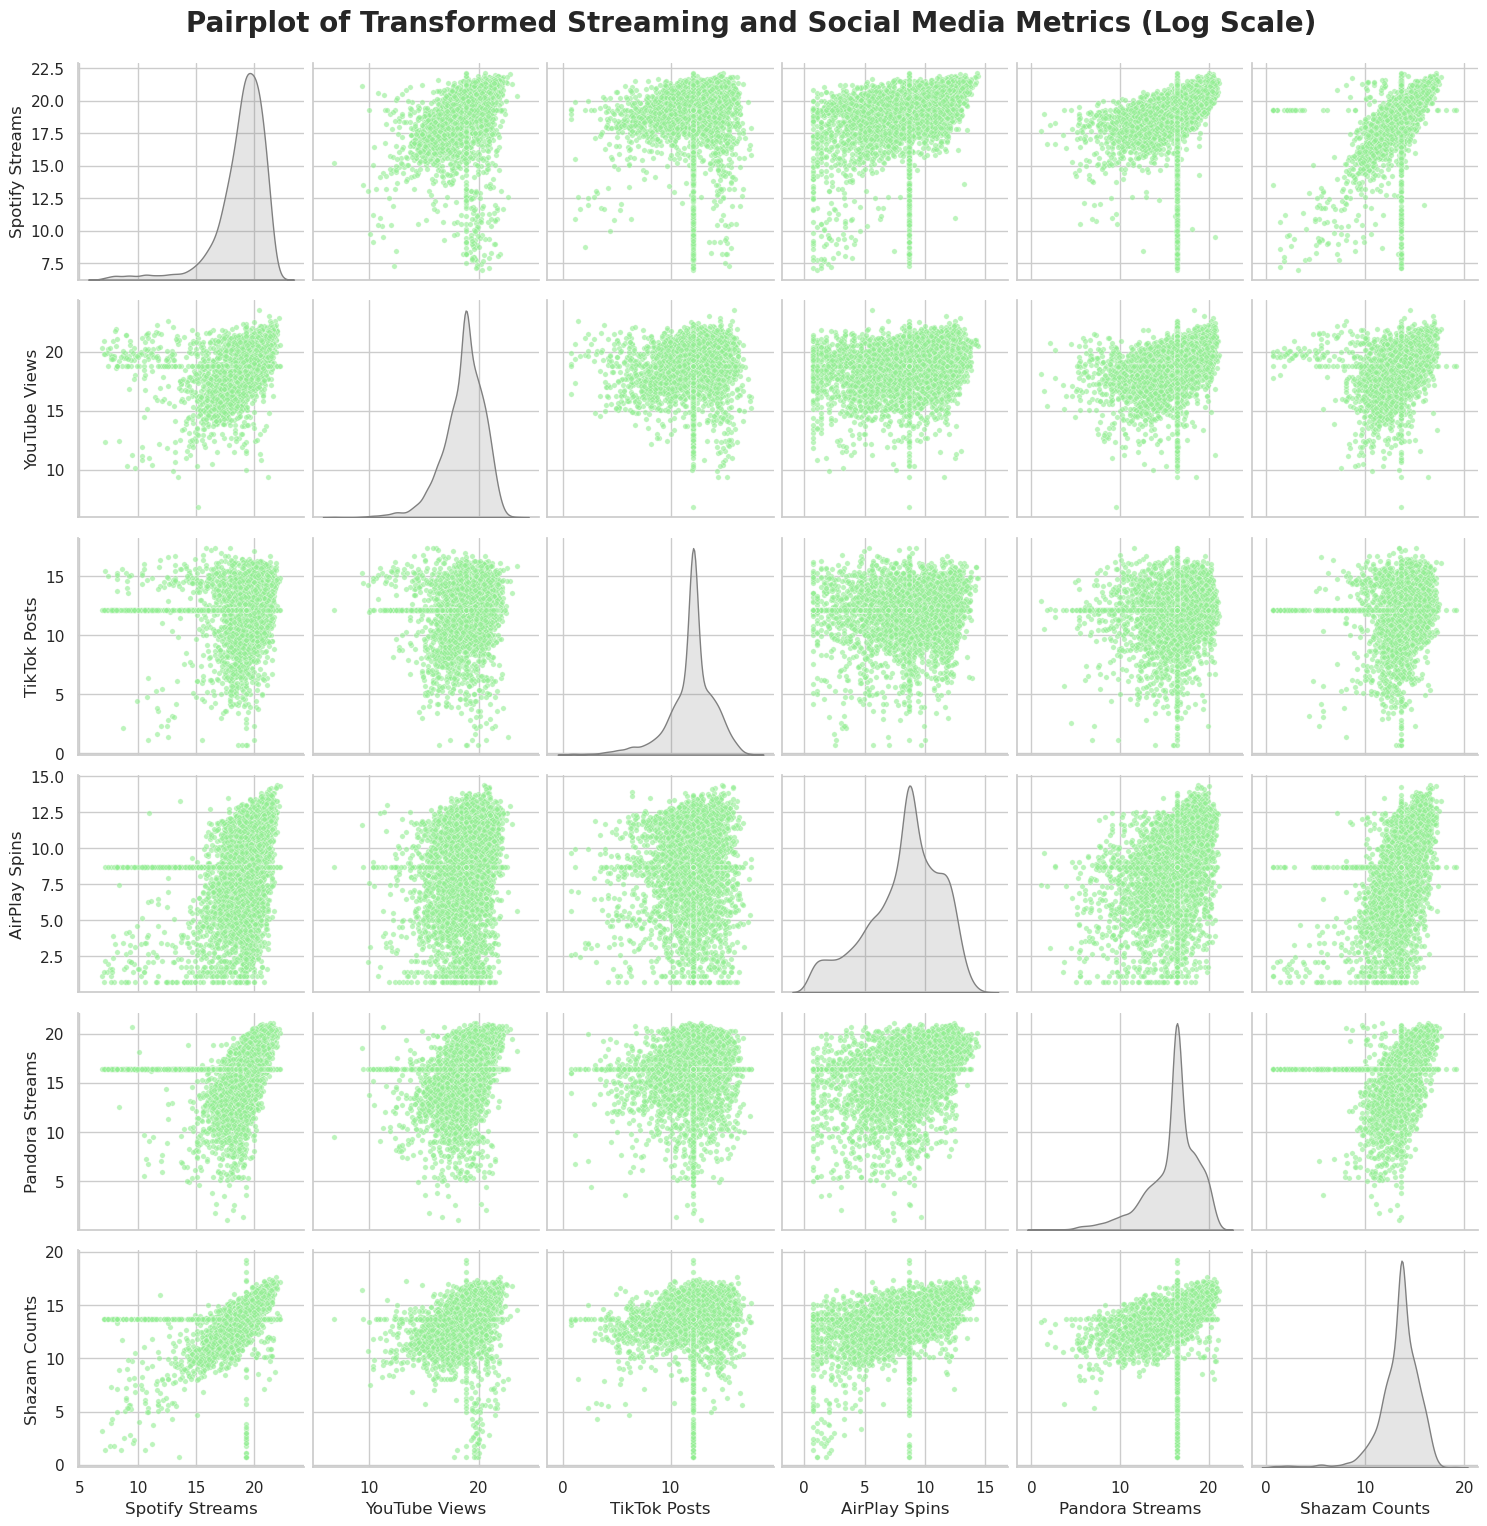

In [126]:
# columns to transform
columns = ['Spotify Streams', 'YouTube Views', 'TikTok Posts', 'AirPlay Spins', 'Pandora Streams', 'Shazam Counts']

# apply log transformation
df_log_transformed = df[columns].apply(lambda x: np.log1p(x))

# pairplot
sns.pairplot(df_log_transformed, diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 15, 'color': 'lightgreen'},
             diag_kws={'alpha': 0.2, 'color': 'gray'}
            )

plt.suptitle('Pairplot of Transformed Streaming and Social Media Metrics (Log Scale)', y=1.02, fontsize=20, fontweight='bold')
plt.show()

## 6. Correlation Amounts Between Streaming and Social Media Metrics

This heatmap is supplemental to the pairplot above. It provides correlation scores for each pair of metrics. Pairs that intersect at darker squares have greater correlations. 

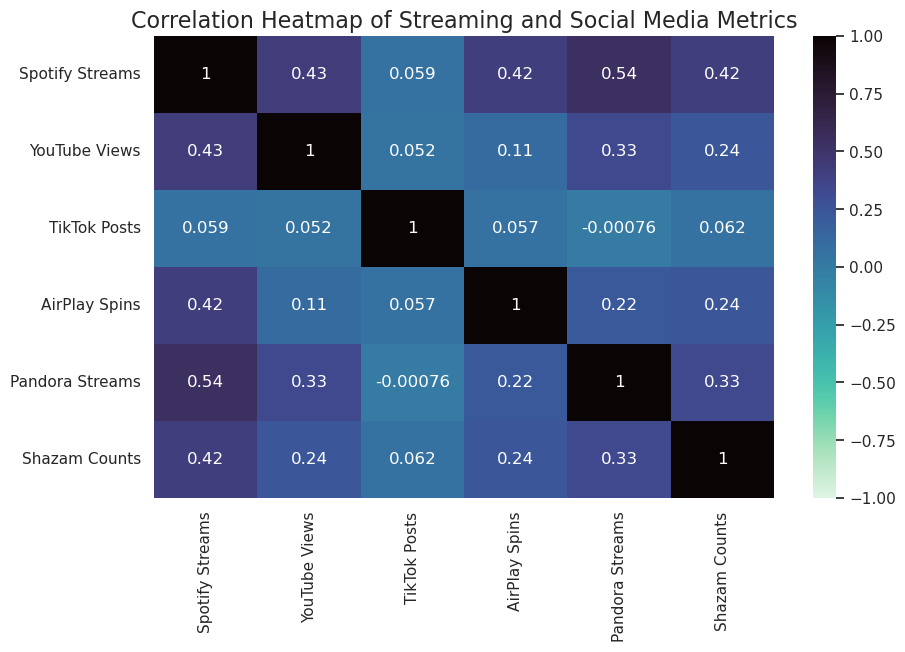

In [181]:
# calculate correlation matrix for selected columns
correlation_matrix = df[columns].corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='mako_r', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Heatmap of Streaming and Social Media Metrics', fontsize=16)
plt.show()

## 7. How Playlist Probability Changes Based on Number of TikTok Posts

This visualization identifies how the number of TikTok posts that include a song affects its probability of being included in a playlist. From the boxenplots below, the extent to which TikTok popularity affects playlist-worthiness is clear: More posts means a higher value and variance in playlist probability.

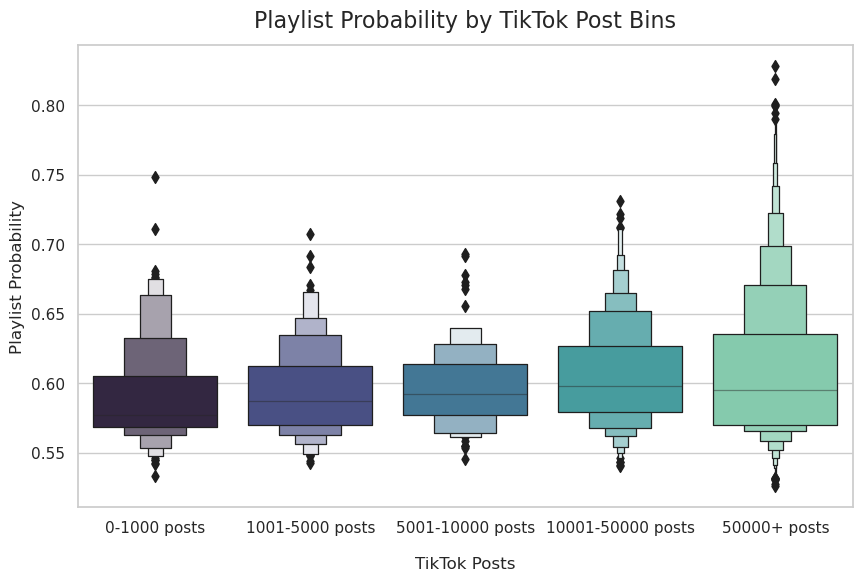

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 5 bins for TikTok post amounts
bin_labels = ['0-1000 posts', '1001-5000 posts', '5001-10000 posts', '10001-50000 posts', '50000+ posts']
bin_edges = [0, 1000, 5000, 10000, 50000, df['TikTok Posts'].max()]

tiktok_posts = pd.DataFrame()

tiktok_posts['TikTok Post Bins'] = pd.cut(df['TikTok Posts'], bins=bin_edges, labels=bin_labels, right=False)
tiktok_posts['Playlist Probability'] = df['Playlist Probability']

# boxenplot - first two boxes are middle 50%, second two boxes are 25%, third two boxes are 12.5%,...
plt.figure(figsize=(10, 6))
sns.boxenplot(tiktok_posts, x='TikTok Post Bins', y='Playlist Probability', palette='mako', linewidth=0.9)
plt.title('Playlist Probability by TikTok Post Bins', fontsize=16, y=1.02)
plt.xlabel('TikTok Posts', labelpad=15)
plt.ylabel('Playlist Probability')
plt.xticks(rotation=0)
plt.show()

## 8. Playlist Probability by Release Year 

The line plot below shows that older songs are indeed more likely to be included in playlists. 

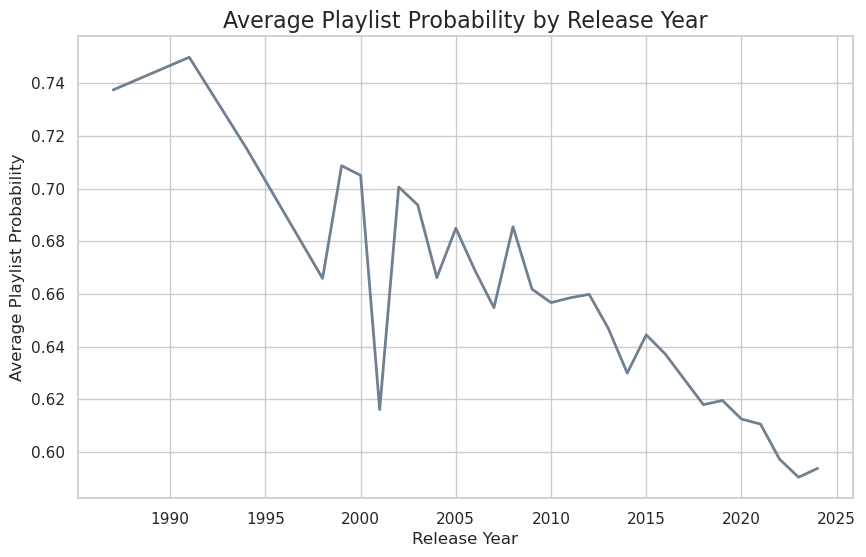

In [ ]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

year = pd.DataFrame()

# extract year from the release date
year['Release Year'] = df['Release Date'].dt.year

year['Playlist Probability'] = df['Playlist Probability']

# group by year and calculate the average playlist probability for each year
playlist_by_year = year.groupby('Release Year')['Playlist Probability'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=playlist_by_year.index, y=playlist_by_year.values, color='slategrey', linewidth=2)
plt.title('Average Playlist Probability by Release Year', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Average Playlist Probability')
plt.show()

## 9. The Most Popular Artists

The visualization below summarizes the top 20 most popular artists across streaming and social media platforms. Some of the results and surprising, while others are expected.

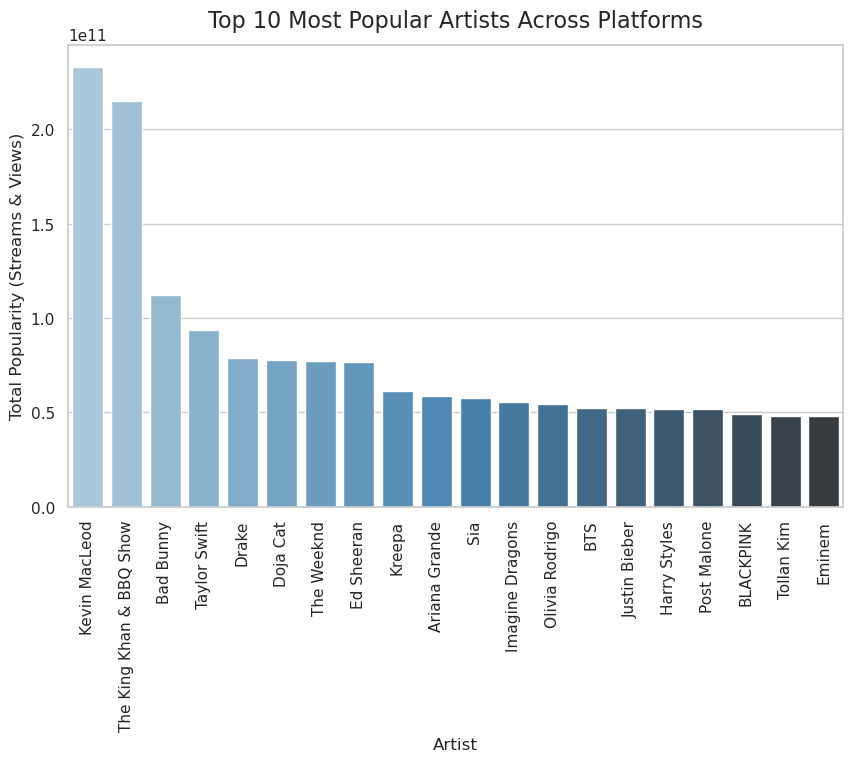

In [197]:
# sum of streams and views across platforms (Spotify, YouTube, TikTok, etc.) for each artist
artist_popularity = df.groupby('Artist')[['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Pandora Streams']].sum()

# sum all platform views/streams for each artist
artist_popularity['Total Popularity'] = artist_popularity.sum(axis=1)

# sort artists by total popularity in descending order
artist_popularity = artist_popularity.sort_values(by='Total Popularity', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_popularity.index, y=artist_popularity['Total Popularity'], palette='Blues_d')
plt.title('Top 10 Most Popular Artists Across Platforms', fontsize=16, y=1.02)
plt.xlabel('Artist')
plt.ylabel('Total Popularity (Streams & Views)')
plt.xticks(rotation=90)
plt.show()

## 10. Genre Word Cloud

The most common genres are visible in this word cloud. It appears that most of the songs are either hip hop, electronic, pop, and pop rock. This makes sense because these genres are easy to get into and are popular. 

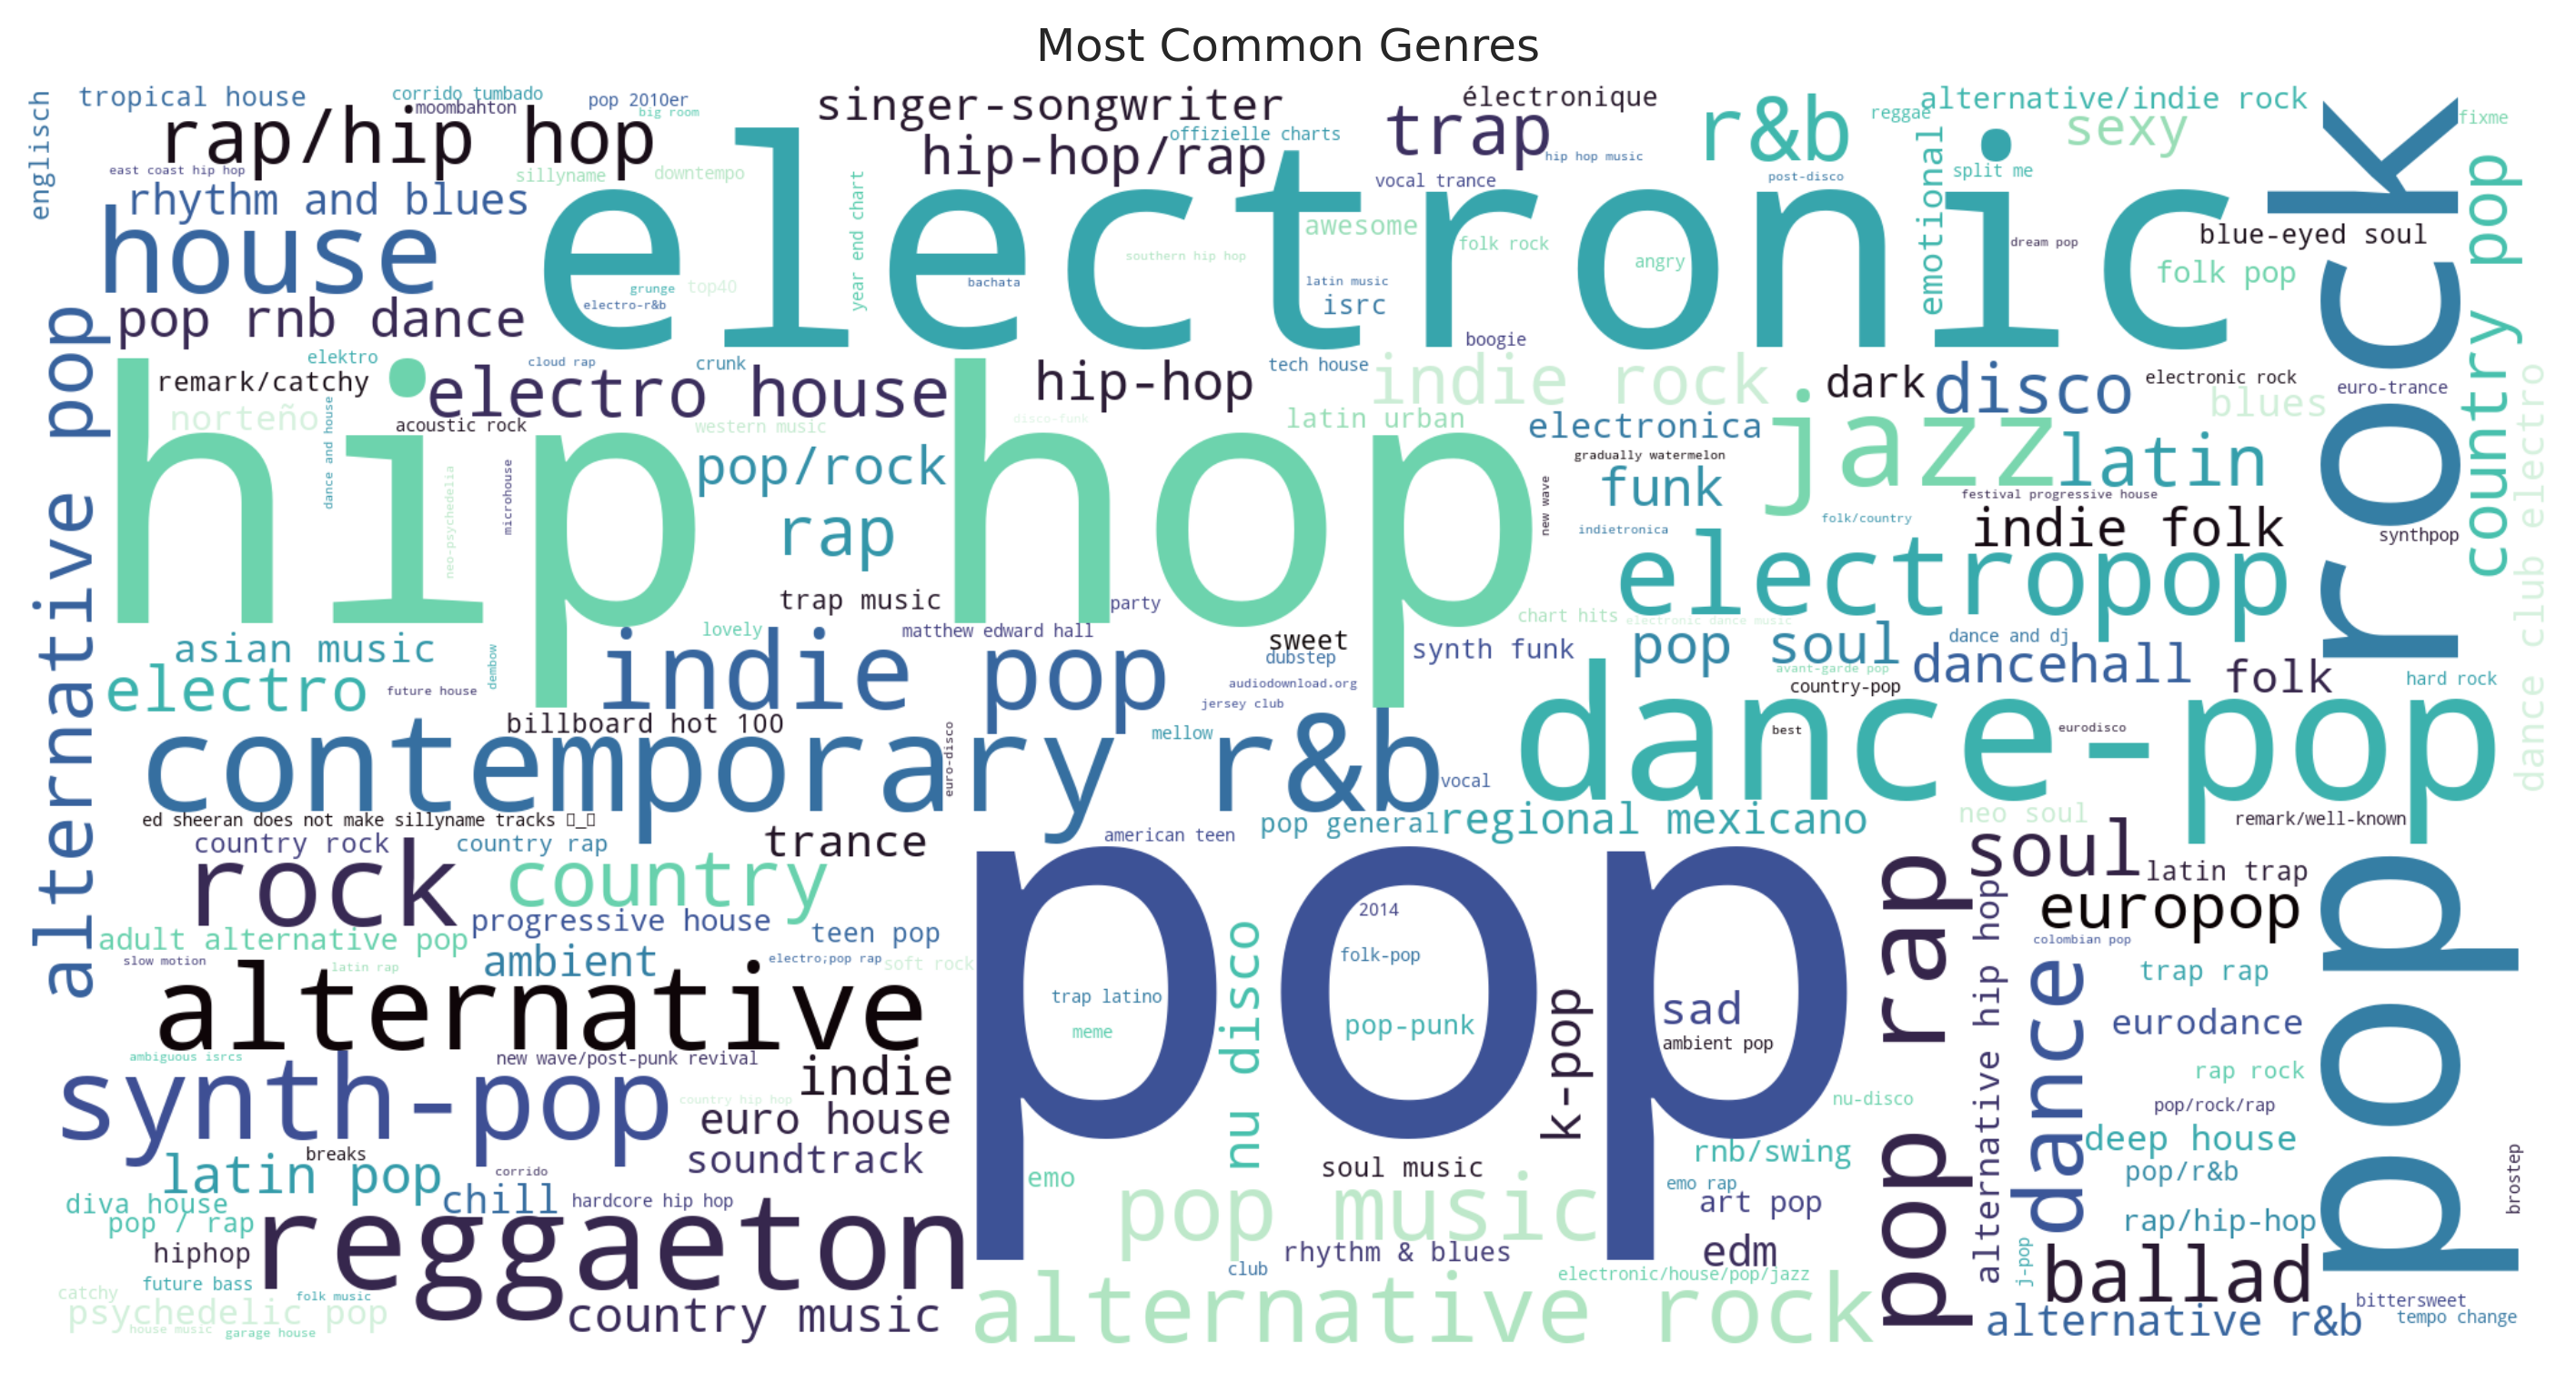

In [233]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# convert string representation of lists into actual lists
genre_df['Genres'] = df['Genres'].apply(ast.literal_eval)

# flatten the list of genres
all_genres = [genre for sublist in genre_df['Genres'] for genre in sublist]

# count occurrences
genre_counts = Counter(all_genres)

# word cloud
wordcloud = WordCloud(width=2000, height=1000, background_color='white', colormap='mako_r')
wordcloud.generate_from_frequencies(genre_counts)

plt.figure(figsize=(12, 6), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Genres')
plt.show()